<img src="https://www.politecnicos.com.br/img/075.jpg" alt="Grupo Turing" height="420" width="420">

# Data Scrapping com Beautiful Soup - Exemplo Prático
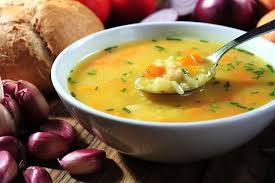

Autor: Felipe Azank dos Santos

Beatiful Soup é um pacote do Python usado especificamente para retirar dados da web ao desenvolver uma lógica entre os arquivos HTML, XML e Python. Essa biblioteca é umas das mais usadas para analisar e navegar em uma [árvore de análise](https://pt.wikipedia.org/wiki/%C3%81rvore_de_an%C3%A1lise_sint%C3%A1tica). 

Em resumo, utilizar o Beautiful Soup com o intuito de criar Data Frames ou documentos para análise de dados consiste, basicamente, nas seguintes etapas:

* Instalar o pacote do Beautiful Soup e do pacote Requests (responsável por "solicitar" o código fonte de sites).


* Encontrar o site que deseja explorar e fazer o seu Request.


* Identificar os dados do site que te interessam.


* Programar, utilizando as lógicas e funções presentes nesse notebook, o "caminho" necessário para encontrar os dados através do código fonte.


* Juntar esses dados em um dicionário, DataFrame, lista, arquivo etc. 

## O objetivo - Top 100 Rotten Tomatoes

<img alt="Resultado de imagem para rotten tomatoes&quot;" class="n3VNCb" src="https://cdn.olivre.com.br/wp-content/uploads/2019/02/rotten-tomatoes-logo1.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 587px; height: 330.481px; margin: 0px;">

Veremos agora um caso real, nosso objetivo é pegar a lista dos [top 100 filmes de 2019](https://www.rottentomatoes.com/top/bestofrt/?year=2019) de acordo com o Rotten Tomatoes, pegar sua nota geral, título, sipnose e duração e colocar tudo em um Data Frame (que provavelmente será analisado em outro notebook). 

## 1 - Importando os pacotes necessários
OBS: Lembre-se de instalar os pacotes caso não os tenha

In [1]:
from bs4 import BeautifulSoup
import requests

## 2 - Encontrando o site e criando o Request

In [2]:
link='https://www.rottentomatoes.com/top/bestofrt/?year=2019' 

source=requests.get(link).text #função para pegar o link e método 'text' para extrair o código fonte html

In [3]:
#Aplicando a função que permite aplicarmos códigos de busca no código HTML
soup=BeautifulSoup(source,'html.parser')

## 3 - Explorando o site
Agora, vamos ver o que podemos fazer usando as principais funções do Beautiful Soup. Mas antes, é preciso entender um pouco de como um código em HTML funciona, aqui estão alguns vídeos e textos caso você precise:

* How HTML Works EDUCBA : https://www.educba.com/html-works/

* Learn HTML in 12 Minutes : https://www.youtube.com/watch?v=bWPMSSsVdPk

* Html-5-tutorial : https://www.html-5-tutorial.com/about-html.htm

* Create a Webpage in 5 minutes : https://medium.com/@blondiebytes/create-a-webpage-in-5-minutes-1602b1f686ac

## Find e Find_all
Talvez as funções mais importantes do pacote, são descritas em detalhe, respectivamente, [aqui](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ptbr/#find) e [aqui](https://www.crummy.com/software/BeautifulSoup/bs4/doc.ptbr/#find-all). Mas em geral, as funções buscam o conteúdo representado pelo "tag" que é inserido em forma de string. A diferença entre as duas funções consiste no fato de que, enquanto o `find()` mostra o primeiro conteúdo que possui essa "tag", o `find_all` busca em todo o HTML, fazendo uma lista com o que achar. Podemos, nessas funções, inserir a classe ou qualquer atributo desejado, com o objetivo de afunilar fortemente nossa busca. 

OBS: Também temos a função `findAll()` que pode ser usada, porém passando um dicionário dos atributos com os valores procurados. 



In [4]:
#### PEGANDO O PRIMEIRO CONTEÚDO COM A TAG "h2" ####

soup.find('h2')

<h2 class="title">Movies in Theaters</h2>

In [5]:
#### PEGANDO TODOS OS CONTEÚDOS COM A TAG "h2" ####

soup.find_all('h2')

[<h2 class="title">Movies in Theaters</h2>,
 <h2 class="title">On Dvd &amp; Streaming</h2>,
 <h2 class="title">More</h2>,
 <h2 class="title">Certified Fresh Picks</h2>,
 <h2 class="title">New TV Tonight</h2>,
 <h2 class="title">Most Popular TV on RT</h2>,
 <h2 class="title">More</h2>,
 <h2 class="title" style="margin-top: 20px">Episodic Reviews</h2>,
 <h2 class="title">Certified Fresh Pick</h2>,
 <h2 class="title">Columns</h2>,
 <h2 class="title">Best and Worst</h2>,
 <h2 class="title">Guides</h2>,
 <h2 class="title">RT News</h2>,
 <h2 class="panel-heading">Top 100 Movies of 2019</h2>,
 <h2 class="panel-heading">Today's Top Rated Movies</h2>,
 <h2><span class="glyphicon glyphicon-envelope"></span>  JOIN THE NEWSLETTER</h2>,
 <h2>Follow Us</h2>]

### Pegando o título da página
Agora, ao ver o código acima, note que o título da página apresenta a classe "Panel-Heading". Tendo isso em vista, vamos usar a `find_all` e passar essa classe

In [6]:
Página = soup.find_all('h2',class_="panel-heading")[0].text
print(Página)
# Note que também passamos "[0]" pois o conteúdo é o primeiro da lista encontrada e ".text" para
# pegarmos apenas texto #

Top 100 Movies of 2019


## Selecionando a tabela de filmes
Ao inspecionar a página, vemos que os filmes se encontram em uma tabela de classe "table", então portanto, acessamos essa parte do html, para facilitar nossa busca, uma vez que o resto do site não importa muito para os nossos objetivos. 

In [7]:
table = soup.find_all('table',class_='table')[0]

## Isolando a lista de filmes
Ao ver mais de perto, notamos que todos os filmes dentro da tabela estão na Tag "tr", portanto, criaremos a lista de filmes e usaremos o comando `for` para executar a mesma ação para todos os filmes. Contudo, vamos primeiro fazer os passos em apenas um filme para melhor entendimento.

In [8]:
filmes = table.find_all('tr')[1:]

## Tirando dados de apenas um filme: Avengers Endgame

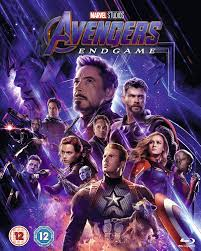

In [9]:
vingadores=filmes[0] 
print(vingadores)

<tr>
<td class="bold">1.</td>
<td>
<span class="tMeterIcon tiny">
<span class="icon tiny certified_fresh"></span>
<span class="tMeterScore"> 94%</span>
</span>
</td>
<td>
<a class="unstyled articleLink" href="/m/avengers_endgame">
            Avengers: Endgame (2019)</a>
</td>
<td class="right hidden-xs">504</td>
</tr>


## Extraindo a nota dada para o filme
Vendo o código fonte acima, a nota está na tag 'span' classe "tMeterScore"

In [10]:
score=vingadores.find('span',class_='tMeterScore').text
score

'\xa094%'

In [11]:
# REALIZANDO UMA MANIPULAÇÃO DE STRING PARA PEGAR APENAS OS NÚMEROS

lista=[int(s) for s in score.split()[0] if s.isdigit()]
score=lista[0]*10+lista[1]
if score == 0:
    score=100
    
print(score) 

94


### Extraindo o título

In [12]:
vingadores.a #inspecionando no site, o título se encontra na Tag 'a'

<a class="unstyled articleLink" href="/m/avengers_endgame">
            Avengers: Endgame (2019)</a>

In [13]:
title=vingadores.a.text
title

'\n            Avengers: Endgame (2019)'

In [14]:
title = title.strip() #método para retirar as marcas de parágrafo e texto

In [15]:
title 

'Avengers: Endgame (2019)'

## Extraindo o link da página do filme do Rotten Tomatoes 
Agora extrairemos o link do filme para automaticamente irmos de um link para outro extraindo informações, e quando aplicarmos esse método em todos os filmes, estaremos de fato "Crawleando" a internet :o

In [16]:
href=vingadores.a['href']
href

'/m/avengers_endgame'

## Montando o próximo request

In [17]:
# MONTANDO O LINK QUE IREMOS USAR EM SEGUIDA
vingadores_link='https://www.rottentomatoes.com'+href


# FAZENDO O REQUEST
source=requests.get(vingadores_link).text


# MONTANDO NOSSA LINDA SOPA DE HTML(rs)
soup2=BeautifulSoup(source,'html.parser')


## Retirando a Sinopse do filme
Nesse código, usaremos outro método de find, que procura o conteúdo ao inserir um dicionário contendo a classe como chave e o valor desejado como...... valor do dicionário. 

In [18]:
Sinop = soup2.findAll("div", {"id": "movieSynopsis"})[0].text #RETIRANDO O TEXTO DO LOCAL

Sinop = Sinop.strip() #PARA NÃO DEIXAR COM MARCAS DE PARÁGRAFO E LINHA

print(Sinop)

The grave course of events set in motion by Thanos that wiped out half the universe and fractured the Avengers ranks compels the remaining Avengers to take one final stand in Marvel Studios' grand conclusion to twenty-two films, "Avengers: Endgame."


## Extraindo o tempo de duração
Nesse ponto, você já deve ter se familiarizado com o processo, que consiste em inspecionar o código do site, ver onde está a informação desejada, e inserir seu caminho com as funções do Beatiful Soup, quebrei o código abaixo como última revisão desse processo.

In [19]:
soup2.find_all('time') # vemos que é a última informação com Tag 'time'

[<time datetime="2019-04-25T17:00:00-07:00">Apr 26, 2019</time>,
 <time datetime="2019-07-29T17:00:00-07:00">Jul 30, 2019</time>,
 <time datetime="P182M">
                                 182 minutes
                             </time>]

In [20]:
soup2.find_all('time')[-1] # Pegamos justamente a última

<time datetime="P182M">
                                182 minutes
                            </time>

In [21]:
duração = soup2.find_all('time')[-1].text # Extraimos apenas o texto
print(duração)


                                182 minutes
                            


In [22]:
duração = duração.strip() # tiramos a marcação de linha e parágrafo

In [23]:
print(duração) 

182 minutes


## Salvando essas informações
Agora, vamos colocar as informações encontradas em um dicionário, para, em seguida, criar um Data Frame ou salvar em arquivos.

In [24]:
Dict = {'Título':title ,'Nota':score, 'Link':vingadores_link,'Sinopse':Sinop,'Duração':duração}

In [25]:
Dict 

{'Título': 'Avengers: Endgame (2019)',
 'Nota': 94,
 'Link': 'https://www.rottentomatoes.com/m/avengers_endgame',
 'Sinopse': 'The grave course of events set in motion by Thanos that wiped out half the universe and fractured the Avengers ranks compels the remaining Avengers to take one final stand in Marvel Studios\' grand conclusion to twenty-two films, "Avengers: Endgame."',
 'Duração': '182 minutes'}

# Aplicando isso para todos os filmes
**Hora da Diversão!**, agora, aplicaremos os mesmos passos que utilizamos em Endgame na lista `filmes`, que fizemos recentemente. Para isso usaremos o clássico comando `for` com algumas listas vazias. 

In [26]:
#LISTAS VAZIAS
Títulos = []
Notas = []
Links = []
Sinopses = []
Durações = []



for filme in filmes:
    
    #Pegando as notas (código idêntico ao da aplicação individual)
    score=filme.find('span',class_='tMeterScore').text
    lista=[int(s) for s in score.split()[0] if s.isdigit()]
    score=lista[0]*10+lista[1]
    if score == 10:
        score=100        
    Notas.append(score)
    
    
    
    
    #Pegando os títulos (código idêntico ao da aplicação individual)
    title=filme.a.text.strip()
    Títulos.append(title)
    
    
    
    
    #Pegando o link de todos os sites
    href=filme.a['href']
    link='https://www.rottentomatoes.com'+href
    Links.append(link)
    
    
    
    
    # FAZENDO O REQUEST
    source=requests.get(link).text
    # MONTANDO NOSSA LINDA SOPA DE HTML(rs)
    soup2=BeautifulSoup(source,'html.parser')
    
    
    
    #Retirando a Sipnose
    Sinop = soup2.findAll("div", {"id": "movieSynopsis"})[0].text.strip()
    Sinopses.append(Sinop)
    
    
    
    
    #Retirando o Tempo de Duração
    duração = soup2.find_all('time')[-1].text.strip()
    Durações.append(duração)
       
    

Títulos=Títulos[:100]
Links=Links[:100]
Sinopses=Sinopses[:100]
Durações=Durações[:100]

## Colocando tudo em um dicionário
Depois de aproximadamente um minuto e meio, o código acima terminou de rodar e podemos colocar os dados que pegamos em um dicionário.

In [27]:
DADOS = {'Títulos':Títulos , 'Nota': Notas , 'Link': Links , 'Sinopse':Sinopses , 'Duração':Durações}

# Colocando os dados em um DataFrame
Agora o momento q estávamos esperando, criar uma DataFrame idêntica as que estamos acostumados a lidar usualmente 

In [28]:
import pandas as pd

df=pd.DataFrame(DADOS)

df.head()

,Títulos,Nota,Link,Sinopse,Duração
0,Avengers: Endgame (2019),94,https://www.rottentomatoes.com/m/avengers_endgame,The grave course of events set in motion by Th...,182 minutes
1,Us (2019),93,https://www.rottentomatoes.com/m/us_2019,Set in present day along the iconic Northern C...,120 minutes
2,Toy Story 4 (2019),97,https://www.rottentomatoes.com/m/toy_story_4,Woody (voice of Tom Hanks) has always been con...,90 minutes
3,Parasite (Gisaengchung) (2019),99,https://www.rottentomatoes.com/m/parasite_2019,Bong Joon Ho brings his work home to Korea in ...,132 minutes
4,Knives Out (2019),97,https://www.rottentomatoes.com/m/knives_out,Acclaimed writer and director Rian Johnson (Br...,130 minutes


# Conclusão
E finalmente, temos nosso dataset FEITO POR NÓS MESMOS. Há de fato maneiras e lógicas de programação que otimizariam nosso processo, contudo esse método é o mais simples para se pegar dados online.

OBS: Perceba que em "Duração", 4 filmes não apresentam adequadamente o tempo do filme, isso ocorre uma vez que o site não mostra essa informação. Você consegue retirar esses valores usando pandas? Consegue transformar a duração em dados numéricos? Tirar o "(2019)" dos títulos? Use o Dataset para treinar suas habilidades em Pandas.

# Material Adicional

* Web Scraping with BeautifulSoup and Requests: https://www.youtube.com/watch?v=ng2o98k983k


* Intro to Web Scraping with Python and Beautiful Soup: https://www.youtube.com/watch?v=XQgXKtPSzUI


* Tutorial Web Scrapping com Python e Beautiful Soup | Português BR: https://www.youtube.com/watch?v=anv-Vt_FL4E


* Web Scrapping 101 - Medium: https://codeburst.io/web-scraping-101-with-python-beautiful-soup-bb617be1f486
